In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
Gdata=pd.read_csv("./data/time_series_covid19_confirmed_global.csv")
Gdata.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,803,820,832,842,850,856,868,872,876,880
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,750,751,751,752,752,754,755,755,758,760
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,35,36,36,36,43,43,45,45,45,45


In [11]:
Gdata_sum=Gdata.groupby('Country/Region').sum()
df=Gdata_sum.drop(["Lat","Long"],axis=1).reset_index()
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226
1,Albania,0,0,0,0,0,0,0,0,0,...,803,820,832,842,850,856,868,872,876,880
2,Algeria,0,0,0,0,0,0,0,0,0,...,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253
3,Andorra,0,0,0,0,0,0,0,0,0,...,750,751,751,752,752,754,755,755,758,760
4,Angola,0,0,0,0,0,0,0,0,0,...,35,36,36,36,43,43,45,45,45,45


['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20']


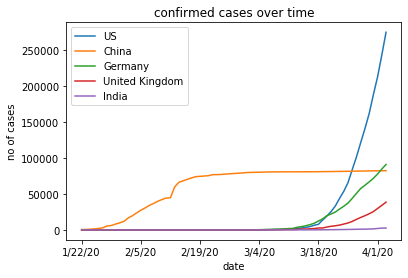

In [51]:
dates=list(df)[1:]
start_date='01/22/2020'
end_date='04/3/2020'

def to_covert_to_int(d):
    first_date=datetime.datetime(2020,1,22)
    date_list=[int(x) for x in d.split('/')]
    date_ob=datetime.datetime(date_list[-1],date_list[0],date_list[1])
    return (date_ob-first_date).days

start_index= to_covert_to_int(start_date)
end_index=to_covert_to_int(end_date)

x_values=dates[start_index:end_index+1]
print(x_values)

countries_to_plot=["US","China","Germany","United Kingdom","India"]

for countries in countries_to_plot:
    country_df=df[df['Country/Region']==countries]
    y=[int(country_df[col]) for col in x_values]
    plt.plot(x_values,y,label=countries)
    
plt.title('confirmed cases over time')
skip=max(len(x_values)//5,1)
plt.xticks(x_values[::skip])
plt.xlabel("date")
plt.ylabel("no of cases")
plt.legend()
plt.show()